# 1. 정렬: 레코드들을 키(key)의 순서로 재배열 하는 것
레코드: 정렬시켜야 될 대상  
여러 개의 필드(field)로 이루어짐  
정렬 키(sort key): 정렬의 기준이 되는 필드  

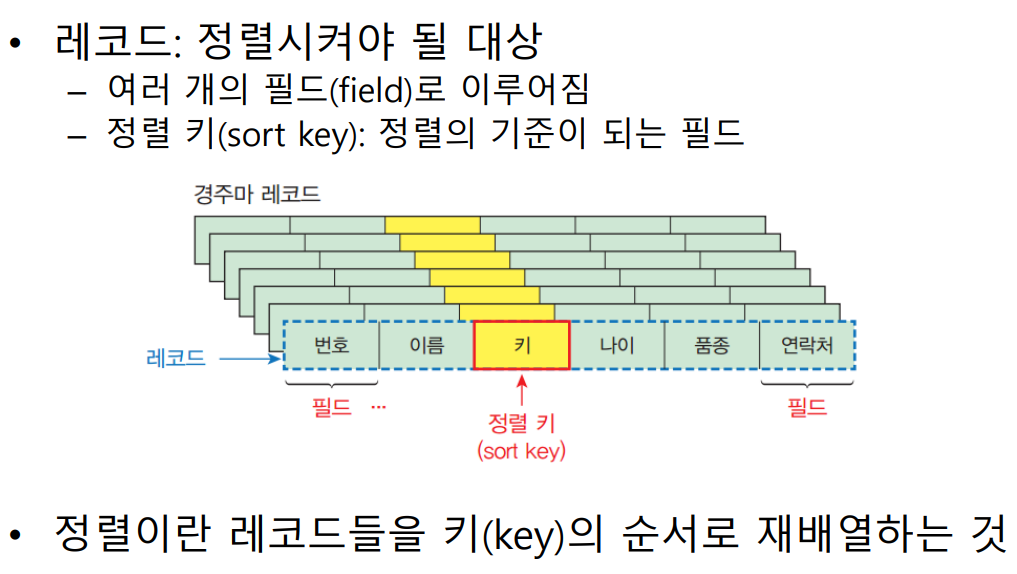

# 정렬 장소에 따른 분류
내부정렬: 모든 데이터가 메인 메모리 (우리는 내부정렬만)  
외부정렬: 외부 기억 장치에 대부분의 레코드  

# 단순하지만 비효율적인 방법
삽입, 선택, 버블정렬 등

# 복잡하지만 효율적인 방법
퀵, 힙, 병합, 기수정렬, 팀 등

# 정렬 알고리즘의 안정성
동일한 키값을 갖는 레코드가 여러개 존재할 경우 정렬 후에도 상대적 위치 변경x  
안정성 있는 정렬은 삽입, 버블, 병합 정렬

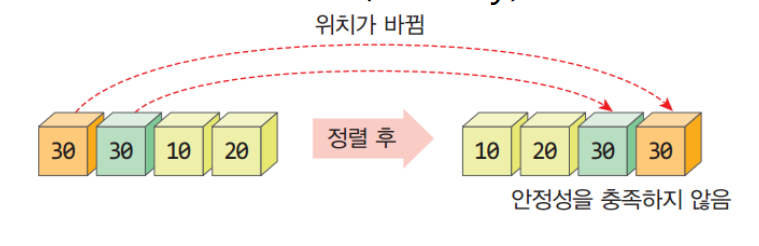

# 1-1 선택 정렬(selection sort)
오른쪽 리스트에서 가장 작은 숫자를 선택하여 왼쪽 리스트의 맨 뒤로 이동하는 작업을 반복  
실제로 두개의 배열을 사용x, 교환

In [2]:
def selection_sort(A) :
    n = len(A)
    for i in range(n-1) :
        least = i;
        for j in range(i+1, n) :  
            if (A[j]<A[least]) : #비교연산
                least = j         #최소항목 갱신
        A[i], A[least] = A[least], A[i]      #배열 항목 교환
        printStep(A, i + 1);   
def printStep(arr, val) :  #중간 과정 출력용 함수
    print("  Step %2d = " % val, end='')
    print(arr)
data = [ 5, 3, 8, 4, 9, 1, 6, 2, 7 ]
print("Original  :", data)
selection_sort(data)
print("Selection :", data)

Original  : [5, 3, 8, 4, 9, 1, 6, 2, 7]
  Step  1 = [1, 3, 8, 4, 9, 5, 6, 2, 7]
  Step  2 = [1, 2, 8, 4, 9, 5, 6, 3, 7]
  Step  3 = [1, 2, 3, 4, 9, 5, 6, 8, 7]
  Step  4 = [1, 2, 3, 4, 9, 5, 6, 8, 7]
  Step  5 = [1, 2, 3, 4, 5, 9, 6, 8, 7]
  Step  6 = [1, 2, 3, 4, 5, 6, 9, 8, 7]
  Step  7 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
  Step  8 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Selection : [1, 2, 3, 4, 5, 6, 7, 8, 9]


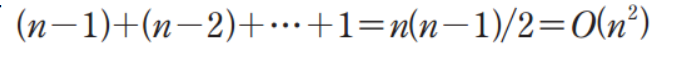

# 효율적 x, 안정성x, 입력자료의 구성과 상관없이 자료 이동횟수가 결정

# 1-2. 삽입 정렬: 비교, 이동

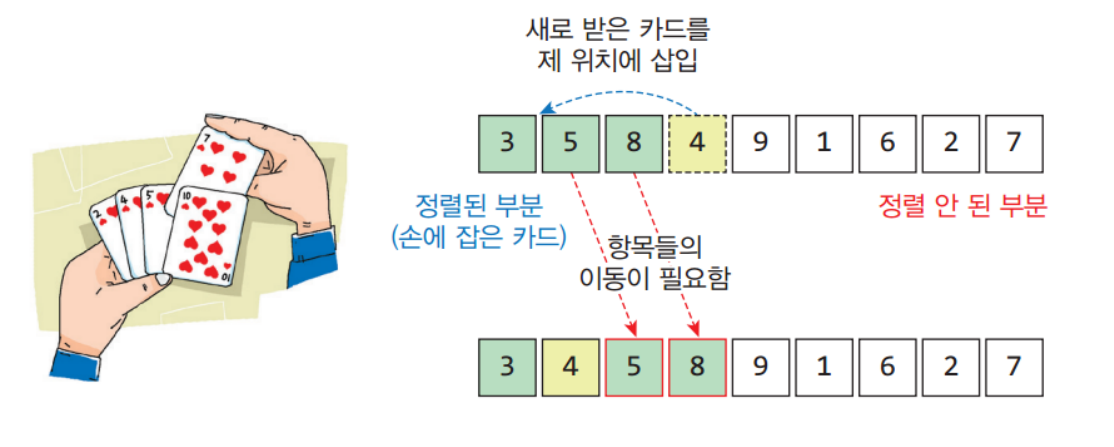

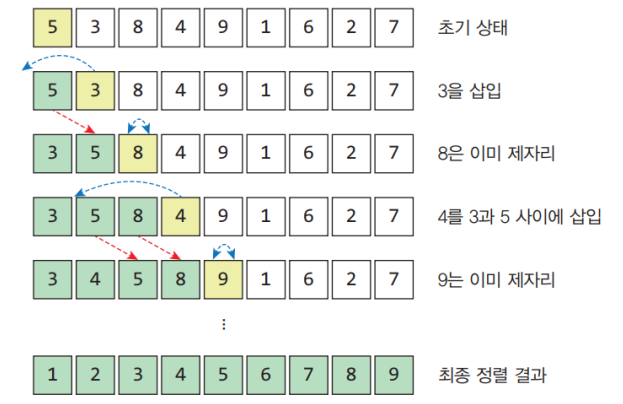

In [3]:
def insertion_sort(A) :
    n = len(A)
    for i in range(1, n):   #외부 루프 1,2,...,n-1
        key = A[i]
        j = i-1
        while j>=0 and A[j] > key :  #내부루프
            A[j + 1] = A[j]   # 항목들을 뒤로 한 칸씩 이동
            j -= 1
        A[j + 1] = key    # 항목 삽입
        printStep(A, i)
        
data = [ 5, 3, 8, 4, 9, 1, 6, 2, 7 ]
print("Original  :", data)
insertion_sort(data)
print("Selection :", data)

Original  : [5, 3, 8, 4, 9, 1, 6, 2, 7]
  Step  1 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  2 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  3 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  4 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  5 = [1, 3, 4, 5, 8, 9, 6, 2, 7]
  Step  6 = [1, 3, 4, 5, 6, 8, 9, 2, 7]
  Step  7 = [1, 2, 3, 4, 5, 6, 8, 9, 7]
  Step  8 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Selection : [1, 2, 3, 4, 5, 6, 7, 8, 9]


최선의 경우 O(n): 이미 정렬되어 있는 경우: 비교 n-1번  
최악의 경우 O(n^2): 역순으로 정렬되어 있는 경우
- 비교 O(n^2)
- 이동 O(n^2)  
- 평균의 경우 O(n^2)

# 특징
많은 이동 필요 -> 레코드가 큰 경우 불리  
안정된 정렬방법  
대부분 정렬되어 있으면 매우 효율적  

# 1-3. 버블 정렬 (bubble sort)
인접한 2개의 레코드를 비교하여 순서대로 서로 교환  
비교-교환 과정을 리스트의 전체에 수행(스캔)  

## 비교-교환 과정이 한번 완료되면 한번의 스캔(스캔1)
한번의 스캔이 완료되면 리스트의 오른쪽 끝에 가장 큰 레코드  
끝으로 이동한 레코드를 제외하고 다시 스캔 반복

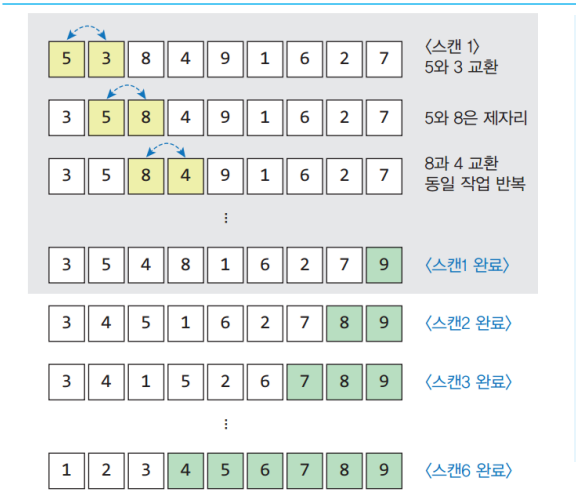

In [4]:
def bubble_sort(A) :
    n = len(A)
    for i in range(n-1, 0, -1) :
        bChanged = False
        for j in range (i) :
            if (A[j]>A[j+1]) :
                A[j], A[j+1] = A[j+1], A[j] 
                bChanged = True
        if not bChanged: break;
        printStep(A, n - i);
        
        
        
data = [ 5, 3, 8, 4, 9, 1, 6, 2, 7 ]
print("Original  :", data)
bubble_sort(data)
print("Selection :", data)
def insertion_sort(A) :
    n = len(A)
    for i in range(1, n):   #외부 루프 1,2,...,n-1
        key = A[i]
        j = i-1
        while j>=0 and A[j] > key :  #내부루프
            A[j + 1] = A[j]   # 항목들을 뒤로 한 칸씩 이동
            j -= 1
        A[j + 1] = key    # 항목 삽입
        printStep(A, i)
        
data = [ 5, 3, 8, 4, 9, 1, 6, 2, 7 ]
print("Original  :", data)
insertion_sort(data)
print("Selection :", data)

Original  : [5, 3, 8, 4, 9, 1, 6, 2, 7]
  Step  1 = [3, 5, 4, 8, 1, 6, 2, 7, 9]
  Step  2 = [3, 4, 5, 1, 6, 2, 7, 8, 9]
  Step  3 = [3, 4, 1, 5, 2, 6, 7, 8, 9]
  Step  4 = [3, 1, 4, 2, 5, 6, 7, 8, 9]
  Step  5 = [1, 3, 2, 4, 5, 6, 7, 8, 9]
  Step  6 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Selection : [1, 2, 3, 4, 5, 6, 7, 8, 9]
Original  : [5, 3, 8, 4, 9, 1, 6, 2, 7]
  Step  1 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  2 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  3 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  4 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  5 = [1, 3, 4, 5, 8, 9, 6, 2, 7]
  Step  6 = [1, 3, 4, 5, 6, 8, 9, 2, 7]
  Step  7 = [1, 2, 3, 4, 5, 6, 8, 9, 7]
  Step  8 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Selection : [1, 2, 3, 4, 5, 6, 7, 8, 9]


# 비교 횟수(최상, 평균, 최악의 경우 모두 일정) O(n^2)
버블 정렬은 매우 단수하지만 효율적이지 않다.  
입력 데이터가 어느정도 정렬되어 있는 경우에 효과적

# 정렬 응용: 집합을 정렬의 개념 사용
집합의 원소들을 항상 정렬된 순으로 저장 -> 삽입연산 변경(복잡)  
집합의 비교나 합집합, 차집합, 교집합 -> 효율적 구현 가능

# 비교연산: eq
O(n^2) -> O(n)으로 개선  
두 집합의 비교 방법  
두 집합의 원소의 개수가 같아야 같은 집합이 됨  
집합이 정렬되어 있으므로 순서대로 같은 원소를 가져야 함

# 합집합/교집합/차집합
O(n^2) -> O(n)으로 개선  
합집합 연산 가장 작은 원소들부터 비교하여 더 작은 원소를 새로운 집합에 넣고  
그 집합의 인덱스를 증가시킴.  
만약 두 집합의 현재 원소가 같으면 하나만을 넣음. 인덱스는 모두 증가시킴.  
한쪽 집합이 모두 처리되면 나머지 집합의 남은 모든 원소를 순서대로 새 집합에 넣음

In [5]:
class Set:       
    def __init__( self ):
        self.items = []    
    def display(self, msg):
        print(msg, self.items)
    def insert(self, elem) :                
        if elem in self.items : return      
        for idx in range(len(self.items)) : 
            if elem < self.items[idx] :     #삽입할 위치 idx를 찾음
                self.items.insert(idx, elem)  #그 위치에 삽입
                return
        self.items.append(elem)      #맨 뒤에 삽입           
    def __eq__( self, setB ):       # self, setB가 같은 집합인가?  
        if self.size() != setB.size() :  # 원소의 개수가 같아야 함
            return False
        for idx in range(len(self.items)): #loop: n번   𝑂(𝑛^2 ) --> 𝑂(𝑛)으로 개선
            if self.items[idx] != setB.items[idx] :   #원소별로 같은지 검사
                return False
        return True
    def union( self, setB ):       
        newSet = Set()
        a = 0
        b = 0
        while a < len( self.items ) and b < len( setB.items ) :
            valueA = self.items[a]
            valueB = setB.items[b]
            if valueA < valueB :
                newSet.items.append( valueA )
                a += 1
            elif valueA > valueB :
                newSet.items.append( valueB )
                b += 1
            else : 
                newSet.items.append( valueA )
                a += 1
                b += 1
        while a < len( self.items ):
             newSet.items.append( self.items[a] )
             a += 1
        while b < len( setB.items) :
             newSet.items.append( setB.items[b] )
             b += 1
        return newSet
    def delete(self, elem) :
        if elem in self.items :  #O(n)
            self.items.remove(elem)
    
    
setA = Set()
setA.insert('휴대폰')
setA.insert('지갑')
setA.insert('손수건')
setA.display('Set A:')
setB = Set()
setB .insert('빗')
setB .insert('파이썬 자료구조')
setB .insert('야구공')
setB .insert('지갑')
setB.display('Set B:')
setA.delete('손수건')
setB.delete('지갑')
setA.display('Set A:')
setB.display('Set B:')
setA.union(setB).display('A U B:')

Set A: ['손수건', '지갑', '휴대폰']
Set B: ['빗', '야구공', '지갑', '파이썬 자료구조']
Set A: ['지갑', '휴대폰']
Set B: ['빗', '야구공', '파이썬 자료구조']
A U B: ['빗', '야구공', '지갑', '파이썬 자료구조', '휴대폰']


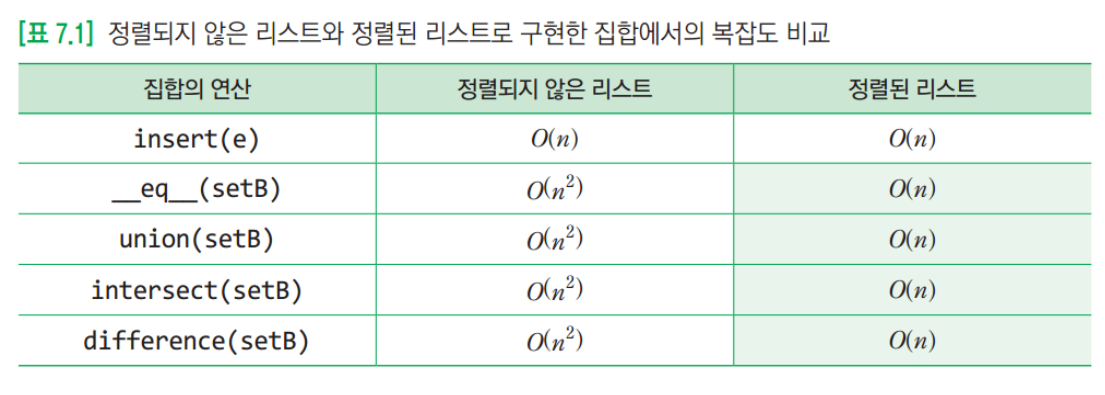

# 2. 탐색, 맵, 엔트리, 딕셔너리
### 탐색
테이블에서 원하는 탐색키를 가진 레코드를 찾는 작업  
### 맵(map) 또는 딕셔너리 (dictionary)
탐색을 위한 자료구조  
엔트리(entry) 또는 키를 가진 레코드의 집합
### 엔트리
키(key): 영어 단어와 같은 레코드를 구분할 수 있는 탐색 키
값(value): 단어의 의미와 같이 탐색키와 관련된 값
### 파이썬의 딕셔너리
파이썬은 내장 자료형으로 딕셔너리 제공, 이것은 자료구조 맵을 구현한 하나의 예

# 맵 ADT

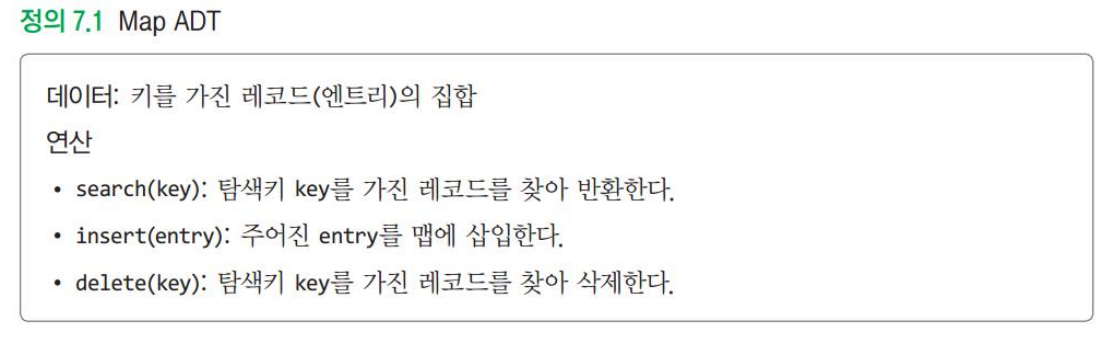

# 순차 탐색(sequential search) O(n)
정렬되지 않은 배열에 적용 가능  
정렬되지 않은 배열을 처음부터 마지막까지 하나씩 검사  
가장 간단하고 직접적인 탐색 방법  
평균 비교 횟수: (n+1)/2번 비교 (최악의 경우: n번)

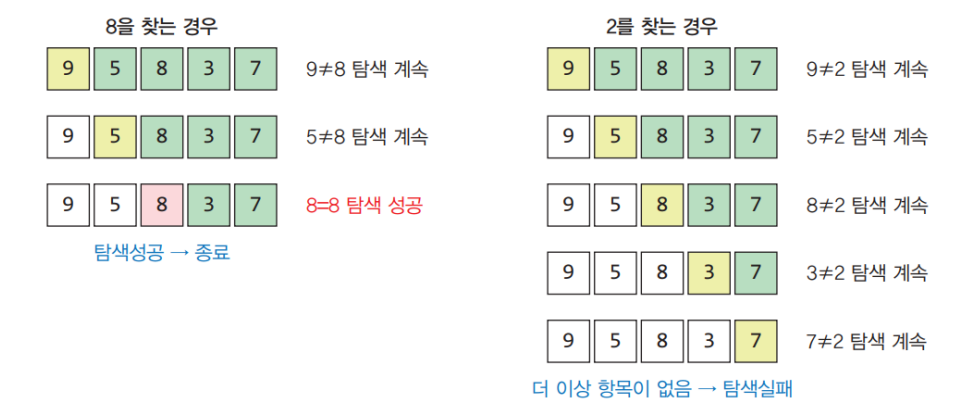

In [5]:
def sequential_search(A, key, low, high) :
    for i in range(low, high+1) :
        if A[i].key == key :  
            return i
    return None

# 이진 탐색(binary search) O(logn)
정렬된 배열의 탐색에 적합  
배열의 중앙에 있는 값을 조사하여 찾고자 하는 항목이 왼쪽 또는 오른쪽 부분  
배열에 있는지를 알아내어 탐색의 범위를 반으로 줄여가며 탐색 진행  
  
예) 사전에서 단어 찾기  
예) 10억 명 중에서 특정한 이름 탐색  
  
이진탐색: 단지 30번의 비교 필요  
순차탐색: 평균 5억번의 비교 필요

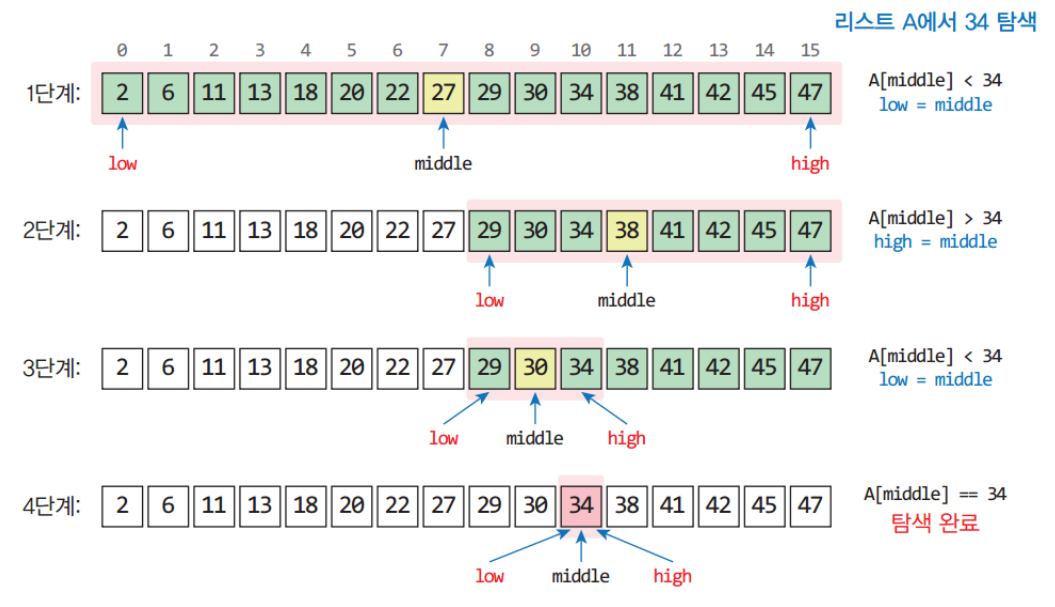

In [4]:
#순환구조
def binary_search(A, key, low, high) :
    if (low <= high) :      
        middle = (low + high) // 2        
        if key == A[middle].key :    
            return middle
        elif (key<A[middle].key) :        
            return binary_search(A, key, low, middle - 1)
        else :
            return binary_search(A, key, middle + 1, high)
    return None  

In [6]:
# 반복구조(반복구조가 더 효율적  대부분 반복구조가 효율적)
def binary_search(A, key, low, high) :
    while (low <= high) :      
        middle = (low + high) // 2        
        if key == A[middle].key :    
            return middle
        elif (key > A[middle].key) :        
            low = middle + 1
        else :
            high = middle - 1
    return None  

# 2-3. 보간 탐색(interpolation search): 이진 탐색의 일종
탐색키가 존재 할 위치를 예측하여 탐색  
예) 사전이나 전화번호부를 탐색할 때  
'ㅎ'으로 시작하는 단어는 사전의 뒷부분에서 찾음  
  
'ㄱ'으로 시작하는 단어는 앞부분에서 찾음  
  
## 리스트를 불균등하게 분할하여 탐색
탐색 값과 위치는 비례한다는 가정: 탐색 위치를 결정할 때 찾고자 하는 키 값이 있는 곳에  
근접하도록 가중치(이진 탐색은 반으로 분할)

# 2-4. 고급 탐색 구조: 해싱 : 세대별 우편함
# 앞선 방법들은 키 값 비교, 해싱은 키 값에 대한 
# 산술적 연산에 의해 테이블의 주소를 계산
해시 테이블(hash table)  
키 값의 연산에 의해 직접 접근이 가능한 구조

# 해싱 

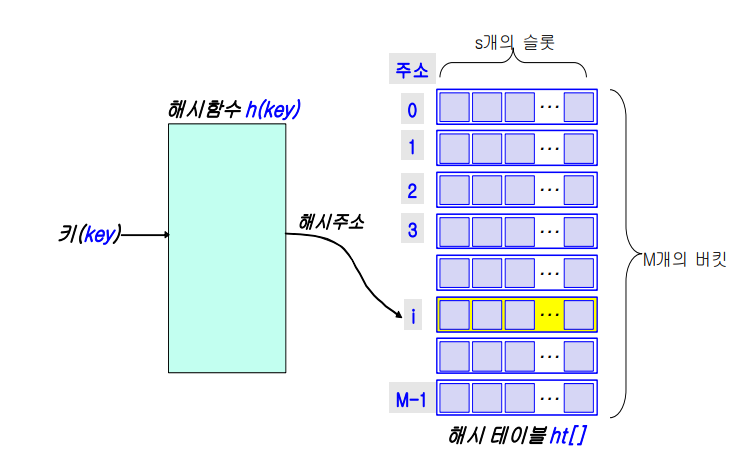

# 충돌(버킷이 충분하지 않으면, 메모리 부족하여 작은 배열을 사용(우편함 공간 부족)
서로 다른 키가 해시함수에 의해 같은 주소로 계산되는 상황

# 충돌과 오버플로

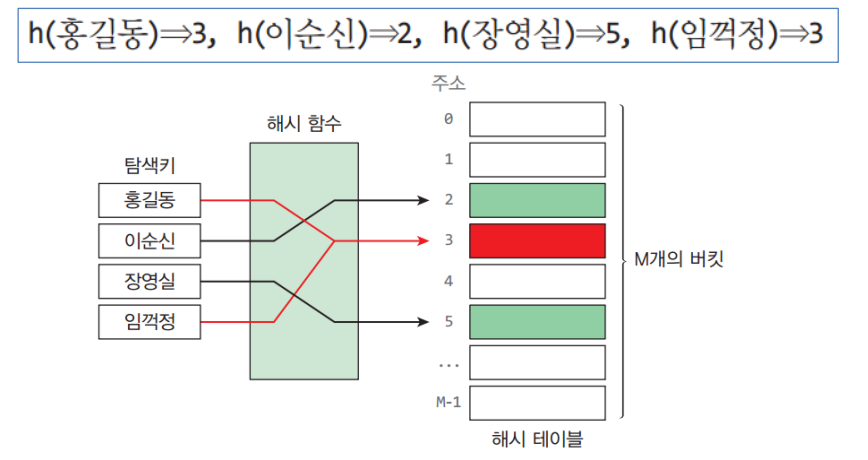

# 오버플로우
충돌이 슬롯 수보다 많이 발생하는 것

# 충돌이 일어나면 해시 테이블의 다음 위치에 저장 (선형탐색)
다음 항목을 순서대로 조사: h(k), h(k)+1, h(k)+2,...  
빈 곳이 있으면 저장  
예) 45, 27, 88, 9, 71, 60, 46, 38, 24 저장 과정

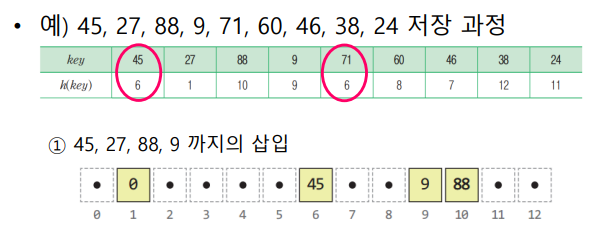

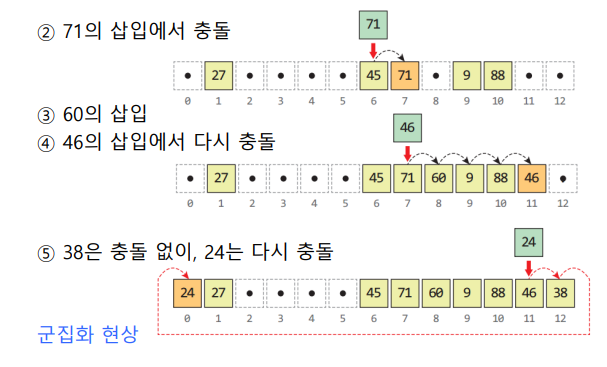

# 군집화 현상: 한번 충돌이 발생한 위치에서 항목들이 집중되는 현상
# 이러한 선형 조사는 오버플로 자주 발생하여 군집화 현상 일어남(탐색의 효율이 저하)

## 탐색 46, 39
46은 키 값 7부터 검색하여 성공  
39는 27 다음 버킷이 비었으므로 실패

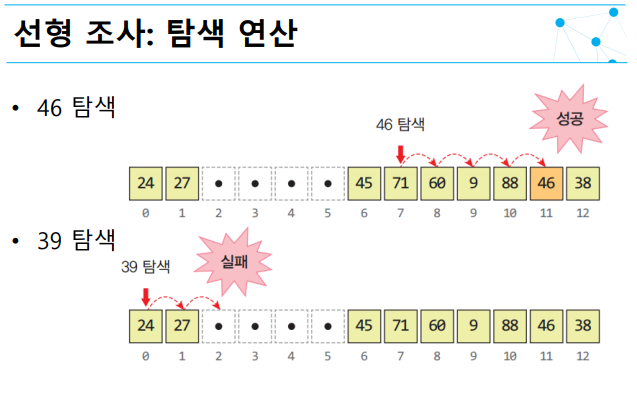

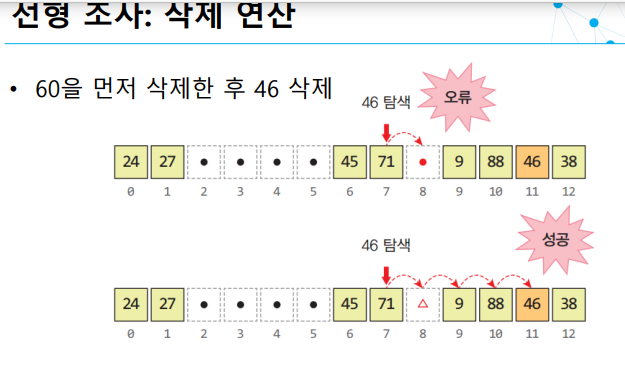

빈 버킷을 두 가지로 분류해야 함  
# 선형탐색: 빈 버킷을 두 가지로 분류
- 한번도 사용X
- 사용되었다가 삭제되어 현재 비어있는 버킷  
탐색과정은 한번도 사용이 않된 버킷을 만나면 중단

# 선형 조사 군집화 완화방법
## a. 이차 조사법(quadratic probing): 충돌 발생 시 조사할 위치 아래와 같이 결정
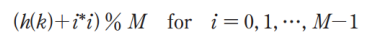
# 선형조사와 근본적으로 동일한 방법, 선형조사보다 더 멀리 떨어진 곳(제곱의 수 만큼)에서 empty 원소 찾는다.
## b. 이중 해싱법(double hashing)
재해싱  
충돌이 발생하면, 다른 해시 함수를 이용해 다음 위치 계산  
해시 함수를 2개 생성 1차 해시 = 위치 찾을 때 사용, 2차 해시함수 = 건너뛰는 값의 크기가 다름

## c. 체이닝(chaining)에 의한 오버플로 처리
체이닝: 하나의 버킷에 여러 개의 레코드를 저장할 수 있도록 하는 방법  
h(k)=k%7을 이용해 8,1,9,6,13을 삽입
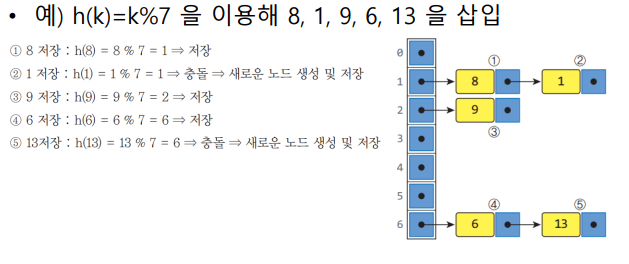

# 해시함수
## 좋은 해시 함수의 조건
충돌이 적어야 한다.  
함수 값이 테이블의 주소 영역 내에서 고르게 분포되어야 한다.  
계산이 빨라야 한다.  

## 1. 제산 함수: 앞서 사용한 나버지 연산을 이용 (가장 널리 사용)
h(k) = k mod M  
해시 테이블의 크기 M은 소수(prime number) 선택

## 2. 폴딩 함수: 탐색 키가 해시 테이블의 크기보다 더 큰 정수일 경우 사용 (몰라도 된다고 한다.)

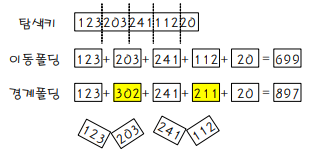

## 3. 중간 제곱 함수
탐색키를 제곱한 다음, 중간의 몇 비트를 취해서 해시 주소 생성
## 4. 비트 추출
키를 이진수로 간주. 임의의 위치의 k개의 비트를 사용
## 5. 숫자 분석 방법
키에서 편중되지 않는 수들을 테이블의 크기에 적합하게 조합

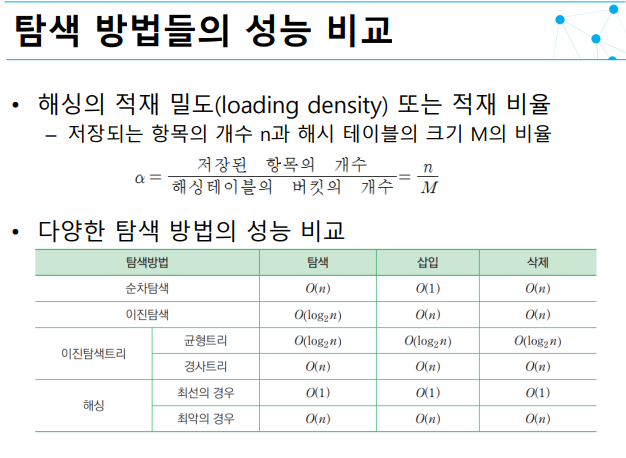

# 순차탐색: 탐색시간 가장 많음(정렬되지 않은 배열에 적용 가능)
# 이진탐색: 정렬된 배열에 적용, 효율적이지만 레코드의 삽입과 삭제 복잡
## (9장에서 이진 탐색 트리 쉽게)
# 해싱: 가장 효율적
# 단점: 순서X, 이전 항목이나 다음 항목 쉽게 찾을 수 없음
## 테이블의 크기 결정 불명확  
## 최악의 경우(모든 키가 하나의 버킷으로 집중되면 시간복잡도 O(n)

# 맵의 응용: 나의 단어장
맵 ADT를 구현  
- 리스트를 이용해 순차 탐색 맵을 구현하는 방법
- 리스트를 정렬해서 이진 탐색 맵을 구현하는 방법
- 선형조사법으로 해시 맵을 구현하는 방법
- 체이닝으로 해시 맵을 구현하는 방법

In [8]:
class Entry:
    def __init__( self, key, value ):
        self.key = key
        self.value = value
    def __str__( self ):
        return str("%s:%s"%(self.key, self.value) )

# 리스트를 이용한 순차탐색 맵
class SequentialMap:  # 순차 탐색맵
    def __init__( self ):
        self.table = []  #맵의 레코드 테이블
    def size( self ): return len(self.table) #레코드 개수
    def display(self, msg):
        print(msg)
        for entry in self.table :  #테이블의 모든 엔트리에대해
            print("  ", entry)
    def insert(self, key, value) :  #삽입연산
        self.table.append(Entry(key, value)) # 리스트 맨뒤에 추가
    def search(self, key) :    #순차 탐색    
        pos = sequential_search(self.table, key, 0, self.size()-1)
        if pos is not None : return self.table[pos]
        else : return None
    def delete(self, key) :  
        for i in range(self.size()):
            if self.table[i].key == key :  # 삭제할 위치 먼저 찾고
                self.table.pop(i)     # 리스트의 pop으로 삭제
                return
map = SequentialMap()
map.insert('data', '자료')
map.insert(
    'structure', '구조')
map.insert('sequential search', '선형 탐색')
map.insert('game', '게임')
map.insert('binary search', '이진 탐색')
map.display("나의 단어장: ")
print("탐색:game --> ", map.search('game'))
print("탐색:over --> ", map.search('over'))
print("탐색:data --> ", map.search('data'))
map.delete('game')
map.display("나의 단어장: ")

나의 단어장: 
   data:자료
   structure:구조
   sequential search:선형 탐색
   game:게임
   binary search:이진 탐색
탐색:game -->  game:게임
탐색:over -->  None
탐색:data -->  data:자료
나의 단어장: 
   data:자료
   structure:구조
   sequential search:선형 탐색
   binary search:이진 탐색


In [9]:
# BinaryMap.
class Entry:
    def __init__( self, key, value ):
        self.key = key
        self.value = value
    def __str__( self ):
        return str("%s:%s"%(self.key, self.value) )
class BinaryMap:
    def __init__( self ):
        self.table = []
    def size( self ): return len(self.table)
#----------------
    def insert(self, key, value) :
        pos = len(self.table)
        while pos>0 :
            if self.table[pos-1].key <= key : break  # 키값의 크기에 따라 위치 찾아 삽입
            pos -= 1
        self.table.insert(pos, Entry(key, value))
    def search(self, key) :             # 순차 탐색
        pos = binary_search(self.table, key, 0, self.size()-1)
        if pos is not None : return self.table[pos]
        else : return None
#---------------------
    def delete(self, key) :
        for i in range(self.size()):
            if self.table[i].key == key :
                self.table.pop(i)
                return
    def display(self, msg):
        print(msg)
        for entry in self.table : print("  ", entry )
def binary_search(A, key, low, high) :
    if (low <= high) :
        middle = (low + high) // 2 
        if key == A[middle].key :
            return middle
        elif (key<A[middle].key) :
            return binary_search(A, key, low, middle - 1)
        else :
            return binary_search(A, key, middle + 1, high)
    return None
map = BinaryMap()
map.insert('data', '자료')
map.display("나의 단어장: ", )
map.insert('structure', '구조')
map.insert('sequential search', '선형 탐색')
map.insert('ab', '선문')
map.insert('game', '게임')
map.insert('binary search', '이진 탐색')
map.display("나의 단어장: ")
print("탐색:game --> ", map.search('game'))
print("탐색:over --> ", map.search('over'))
print("탐색:data --> ", map.search('data'))
map.delete('game')
map.display("나의 단어장: ")

나의 단어장: 
   data:자료
나의 단어장: 
   ab:선문
   binary search:이진 탐색
   data:자료
   game:게임
   sequential search:선형 탐색
   structure:구조
탐색:game -->  game:게임
탐색:over -->  None
탐색:data -->  data:자료
나의 단어장: 
   ab:선문
   binary search:이진 탐색
   data:자료
   sequential search:선형 탐색
   structure:구조


# 체이닝을 이용한 해시 맵

In [10]:
class Node:
    def __init__( self, data, link=None ):
        self.data = data
        self.link = link
class HashChainMap:
    def __init__( self, M ):
        self.table = [None]*M
        self.M = M
    def hashFn(self, key) :  # 해시함수: 문자열의 모든문자 아스키값을 더하고 테이블 크기로 나머지 값
        sum = 0
        for c in key :
            sum = sum +  ord(c)
        return sum % self.M
    def insert(self, key, value) :
        idx = self.hashFn(key)
        self.table[idx] = Node(Entry(key,value), self.table[idx])
    def search(self, key) :
        idx = self.hashFn(key)
        node = self.table[idx]
        while node is not None:
            if node.data.key == key :
                return node.data
            node = node.link
        return None
    def delete(self, key) :
        idx = self.hashFn(key)
        node = self.table[idx]
        before = None
        while node is not None:         
            if node.data.key == key :   
                if before == None :     
                    self.table[idx] = node.link
                else :                  
                    before.link = node.link
                return
            before = node
            node = node.link
    def display(self, msg):
        print(msg)
        for idx in range(len(self.table)) :
            node = self.table[idx]
            if node is not None :
                print("[%2d] -> "%idx, end='')
                while node is not None:
                    print(node.data, end=' -> ')
                    node = node.link
                print()
map = HashChainMap(13)
map.insert('data', '자료')
map.insert('structure', '구조')
map.insert('sequential search', '선형 탐색')
map.insert('game', '게임')
map.insert('binary search', '이진 탐색')
map.display("나의 단어장: ")
print("탐색:game --> ", map.search('game'))
print("탐색:over --> ", map.search('over'))
print("탐색:data --> ", map.search('data'))
map.delete('game')
map.display("나의 단어장: ")

나의 단어장: 
[ 3] -> sequential search:선형 탐색 -> 
[ 7] -> binary search:이진 탐색 -> game:게임 -> data:자료 -> 
[ 8] -> structure:구조 -> 
탐색:game -->  game:게임
탐색:over -->  None
탐색:data -->  data:자료
나의 단어장: 
[ 3] -> sequential search:선형 탐색 -> 
[ 7] -> binary search:이진 탐색 -> data:자료 -> 
[ 8] -> structure:구조 -> 


# 파이썬의 딕셔너리를 이용한 구현

In [11]:
d = {}
d['data'] =  '자료'
d['structure'] = '구조'
d['sequential search'] = '선형 탐색'
d['game'] = '게임'
d['binary search'] = '이진 탐색'
print("나의 단어장:")
print(d)
if d.get('game') : print("탐색:game --> ", d['game'])
if d.get('over') : print("탐색:over --> ", d['over'])
if d.get('data') : print("탐색:data --> ", d['data'])
d.pop('game')
print("나의 단어장:")
print(d)

나의 단어장:
{'data': '자료', 'structure': '구조', 'sequential search': '선형 탐색', 'game': '게임', 'binary search': '이진 탐색'}
탐색:game -->  게임
탐색:data -->  자료
나의 단어장:
{'data': '자료', 'structure': '구조', 'sequential search': '선형 탐색', 'binary search': '이진 탐색'}
